# 1.1 Artificial Intelligence, Machine Learning, and Deep Learning

Artificial Intelligence (AI), Machine Learning (ML), and Deep Learning (DL) are often discussed together, representing different levels of abstraction in the pursuit of creating intelligent machines.

### Defining AI, ML, and DL

* AI is the broadest concept, encompassing any technique that enables computers to mimic human intelligence.
* Machine Learning is a subset of AI that focuses on building systems that learn from data without being explicitly programmed.
* Deep Learning is a further subset of Machine Learning that utilizes neural networks with multiple layers (deep neural networks) to automatically learn hierarchical representations of data.

### Notebook Overview

This notebook will explore these concepts and their relationships in more detail.

* Artificial Intelligence
* Machine learning
* Learning representations from data
* The “deep” in deep learning
* Understanding how deep learning works, in three steps
* What deep learning has achieved so far
* Don’t believe the short-term hype
* The promise of AI


## Artificial Intelligence

Artificial Intelligence (AI) is a broad field of computer science that aims to create machines capable of performing tasks that typically require human intelligence. These tasks include learning, problem-solving, perception, decision-making, and language understanding.

### Goals of AI

*   The ultimate goal of AI is to develop systems that can reason, act, and adapt like humans, or even surpass human capabilities in specific areas.

### Approaches in AI

*   AI encompasses a wide range of approaches, from symbolic reasoning and expert systems to machine learning and deep learning.

## Machine learning

Machine learning (ML) is a subfield of artificial intelligence that focuses on the development of algorithms that allow computers to learn from data without being explicitly programmed.

### How ML Works

*   Instead of following rigid, predefined instructions, ML models identify patterns and relationships within data to make predictions or decisions.
*   This iterative process of learning from experience enables ML systems to improve their performance over time as they are exposed to more data.

### Applications of ML

*   Machine learning is a powerful approach for tasks where traditional programming is difficult or impossible due to the complexity or dynamic nature of the problem.

The following example shows a basic ML algorithm called Linear regression

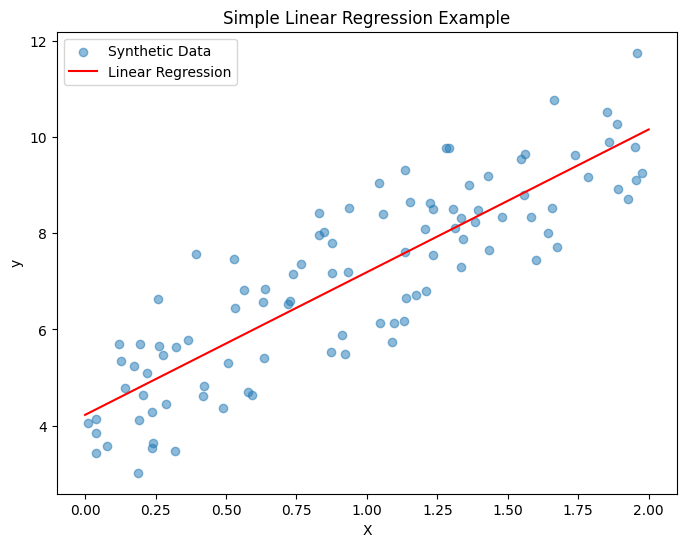

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 2. Generate some simple synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 3. Import a simple linear regression model (already done above)
# 4. Instantiate and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# 5. Import matplotlib.pyplot (already done above)
# 6. Create a scatter plot of the synthetic data points
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.5, label='Synthetic Data')

# 7. Plot the trained linear regression line
X_new = np.array([[0], [2]])
y_predict = model.predict(X_new)
plt.plot(X_new, y_predict, "r-", label='Linear Regression')

# 8. Add appropriate labels and a title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression Example')
plt.legend()

# 9. Display the plot
plt.show()

## Learning representations from data

In machine learning, especially in deep learning, "learning representations from data" refers to the process by which a model automatically discovers and extracts meaningful features or patterns from raw input data.

### Transforming Raw Data

*   Raw data, such as images, text, or audio, is often in a format that is not directly suitable for algorithms to perform tasks like classification or regression.
*   Learning representations involves transforming this raw data into a more abstract, useful, and often lower-dimensional form that highlights the aspects most relevant to the task at hand.

### Hierarchical Understanding

*   This transformation is learned from the data itself, allowing the model to build a hierarchical understanding of the information, with each layer of a deep learning network learning increasingly complex and abstract representations.

The following code cell shows a practical example of Learning Representations of Data

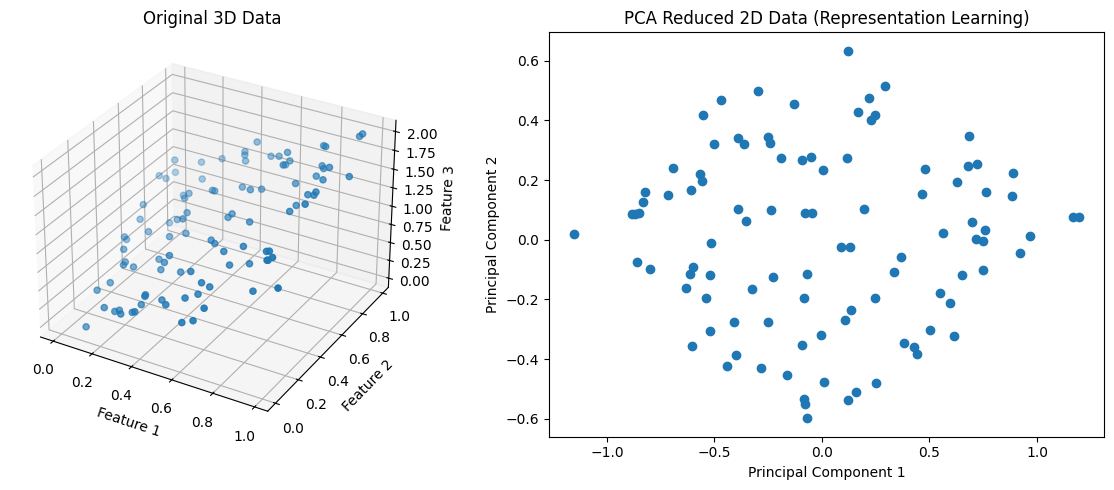

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# 2. Generate some simple, high-dimensional synthetic data (3D data on a 2D plane)
np.random.seed(42)
X_3d = np.random.rand(100, 3)
X_3d[:, 2] = X_3d[:, 0] + X_3d[:, 1] + np.random.randn(100) * 0.1 # Add some noise

# 3. Instantiate a PCA object to reduce the dimensionality (to 2 components)
pca = PCA(n_components=2)

# 4. Fit the PCA model to the synthetic data and transform the data
X_2d = pca.fit_transform(X_3d)

# 5. Create a scatter plot of the original high-dimensional data in 3D
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2])
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')
ax1.set_title('Original 3D Data')

# 6. Create a scatter plot of the dimensionality-reduced data in 2D
ax2 = fig.add_subplot(122)
ax2.scatter(X_2d[:, 0], X_2d[:, 1])
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_title('PCA Reduced 2D Data (Representation Learning)')

# 7. Add appropriate labels and titles to both plots (done above)
# 8. Display both plots to visualize the representation learning (dimensionality reduction)
plt.tight_layout()
plt.show()

## The “deep” in deep learning

The term "deep" in deep learning refers to the architecture of the neural networks used, specifically the presence of multiple hidden layers between the input and output layers.

### Deep vs. Shallow Networks

*   Traditional neural networks, often called "shallow" networks, typically have only one hidden layer.
*   Deep neural networks, on the other hand, can have tens, hundreds, or even thousands of these hidden layers stacked sequentially.

### Hierarchical Feature Learning

*   Each layer learns to transform the input data into a slightly more abstract and composite representation.
*   This hierarchical structure allows deep learning models to automatically learn intricate patterns and complex features from raw data, progressively building higher-level representations from lower-level ones.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


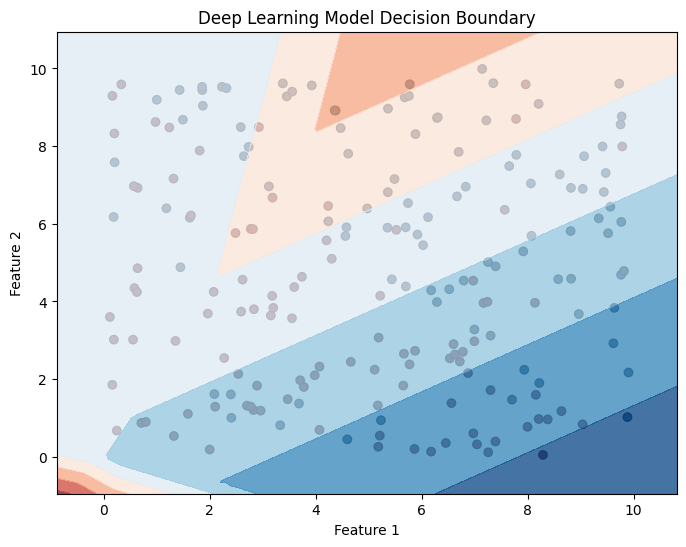

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 2. Generate some simple synthetic data for a binary classification problem
np.random.seed(0)
X = np.random.rand(200, 2) * 10
y = (X[:, 0] + X[:, 1] > 10).astype(int) # Simple boundary x + y = 10

# Add some noise to make it more interesting
noise_mask = np.random.rand(200) < 0.1
y[noise_mask] = 1 - y[noise_mask]


# 3. Define a simple sequential deep learning model
model = Sequential([
    Dense(4, input_shape=(2,), activation='relu'), # Hidden layer with ReLU activation
    Dense(1, activation='sigmoid') # Output layer with sigmoid for binary classification
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 5. Train the model
history = model.fit(X, y, epochs=50, verbose=0) # Train for 50 epochs, hide progress

# 6. Generate a grid of points to visualize the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# 7. Make predictions on this grid of points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 8. Create a scatter plot of the original data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')

# 9. Overlay a contour plot of the model's predictions on the grid
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

# 10. Add appropriate labels and a title to the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Deep Learning Model Decision Boundary')

# 11. Display the plot
plt.show()

## Understanding how deep learning works, in three steps

### Step 1: Transformation through layers

Deep learning networks work by progressively transforming the input data through a series of layers.

*   Each layer in the network takes the output of the previous layer as its input and applies a simple, learnable transformation.
*   This transformation is typically a combination of linear operations and non-linear activation functions.
*   For a single neuron in a layer, the linear transformation can be represented as:

    $z = \mathbf{w} \cdot \mathbf{x} + b$

    Where:
    *   $\mathbf{x}$ is the input vector from the previous layer.
    *   $\mathbf{w}$ is the weight vector.
    *   $b$ is the bias term.
    *   $z$ is the result of the linear transformation.
*   This is followed by a non-linear activation function, $a = f(z)$, where $f$ is the activation function (e.g., ReLU, sigmoid, tanh).
*   The output of a layer becomes the input for the next layer, gradually filtering and refining the data.

### Step 2: Learning hierarchical representations

As the data is transformed through the layers, the network learns increasingly abstract and hierarchical representations of the input.

*   Early layers might learn simple features like edges or corners in an image.
*   Deeper layers combine these simple features to recognize more complex patterns like shapes or textures.
*   This hierarchical structure allows models to automatically discover complex patterns without manual feature engineering.

### Step 3: Training through backpropagation and gradient descent

The learning process in deep learning is driven by training data and an optimization algorithm called gradient descent.

*   The network makes predictions on the training data, and the difference between the predictions ($\hat{y}$) and the actual target values ($y$) is calculated using a loss function, $L(y, \hat{y})$.
*   This error (loss) is then propagated backward through the network, layer by layer, in a process called **backpropagation**.
*   Backpropagation calculates the gradient of the loss function with respect to each parameter (weights and biases) in the network, indicating how much each parameter contributed to the error:

    $\frac{\partial L}{\partial \mathbf{w}}, \frac{\partial L}{\partial b}$.
*   **Gradient descent** then uses these gradients to adjust the parameters in a way that minimizes the loss. The update rule for a parameter $\theta$ is:

    $\theta = \theta - \alpha \frac{\partial L}{\partial \theta}$

    Where:
    *   $\alpha$ is the learning rate, controlling the step size of the updates.
*   This iterative process of forward pass (prediction), calculating loss, backpropagation (calculating gradients), and updating parameters continues until the network's performance on the training data converges.

## What deep learning has achieved so far

Deep learning has revolutionized various fields, achieving state-of-the-art results in tasks that were previously challenging for traditional machine learning methods.

### Image Recognition

*   Deep convolutional neural networks (CNNs) have dramatically improved the accuracy of image recognition and classification tasks.
*   Breakthroughs like AlexNet's performance in the 2012 ImageNet competition demonstrated the power of deep learning to identify objects, faces, and scenes in images with unprecedented accuracy, surpassing previous methods by a significant margin.
*   This has led to applications like image search, automated image tagging, and facial recognition.

### Natural Language Processing (NLP)

*   Deep learning models, particularly recurrent neural networks (RNNs) and more recently, transformer networks, have significantly advanced the capabilities of natural language processing.
*   Tasks such as machine translation, sentiment analysis, text summarization, and question answering have seen substantial improvements.
*   Large language models (LLMs) like GPT-4 and BERT, trained on massive datasets, can generate human-quality text, understand context, and perform a wide range of language-related tasks.

### Speech Recognition

*   Deep learning, particularly using recurrent neural networks (RNNs) and convolutional neural networks (CNNs), has led to significant improvements in automatic speech recognition (ASR) systems.
*   Deep learning models can better handle variations in speech patterns, accents, and background noise, resulting in more accurate transcription of spoken language.
*   This has fueled the development of virtual assistants, dictation software, and real-time translation services.

### Game Playing

*   Deep reinforcement learning has achieved superhuman performance in complex games.
*   Google's DeepMind's AlphaGo famously defeated the world champion in the game of Go, a feat previously thought to be years away.
*   Subsequent models have demonstrated mastery in other games like chess and video games, showcasing deep learning's ability to learn optimal strategies through trial and error in complex environments.

### Healthcare

*   Deep learning is being increasingly applied in healthcare for tasks such as medical image analysis (e.g., detecting diseases from X-rays or MRIs), drug discovery, and predicting patient outcomes.
*   Deep learning models can analyze large and complex medical datasets to identify patterns that may not be apparent to human observers, aiding in diagnosis and personalized treatment.

### Robotics

*   Deep learning is enabling robots to perceive their environment, make decisions, and perform complex tasks with greater autonomy.
*   This includes tasks like object recognition and manipulation, navigation in unstructured environments, and learning from demonstrations.
*   Deep learning allows robots to learn from data and adapt to new situations, moving beyond pre-programmed behaviors.

## Don’t believe the short-term hype

It's crucial to temper enthusiasm for deep learning with a realistic understanding of its current capabilities and limitations.

### Understanding Limitations

*   While deep learning has delivered remarkable breakthroughs in specific areas like image recognition and natural language processing, there's a tendency for over-excitement and the propagation of exaggerated claims in the short term.
*   The immediate future of AI may not bring about the rapid, general-purpose intelligence often depicted in science fiction.

### Remaining Challenges

*   Many challenges remain, including the need for vast amounts of data for training, explainability and interpretability of models, addressing biases in data, and generalizing to novel situations outside of the training distribution.
*   Understanding these limitations is essential to avoid disappointment and to focus on the practical and achievable applications of deep learning in the near term.

## The promise of AI

Looking beyond the present capabilities and short-term hype, the long-term promise of Artificial Intelligence is profound and holds the potential to fundamentally reshape various aspects of human life and society.

### Long-term Potential

*   In the long run, AI could lead to breakthroughs in scientific research, accelerating discoveries in fields like medicine, materials science, and climate modeling.
*   It could power personalized education systems, optimize resource allocation on a global scale, and enable more sophisticated and intuitive human-computer interaction.

### Ethical Considerations and the Future

*   While challenges related to ethics, bias, and societal impact need careful consideration, the ultimate promise of AI lies in its potential to augment human capabilities, solve complex global problems, and unlock new frontiers of knowledge and innovation, leading to a future where intelligent systems collaborate with humans to achieve previously unattainable goals.

## Summary and Conclusion

Here is a summary of the key concepts discussed in this notebook:

*   **Artificial Intelligence (AI)**: The broadest concept, aiming to create machines that mimic human intelligence.
*   **Machine Learning (ML)**: A subset of AI where systems learn from data without explicit programming.
*   **Deep Learning (DL)**: A subset of ML using deep neural networks with multiple layers to learn hierarchical representations.
*   **Learning Representations**: The process of models automatically discovering and extracting meaningful features from raw data.
*   **The "Deep" in Deep Learning**: Refers to the multiple hidden layers in neural networks that enable hierarchical feature learning.
*   **How Deep Learning Works**: Involves transformation through layers, learning hierarchical representations, and training through backpropagation and gradient descent.
*   **Deep Learning Achievements**: Revolutionized fields like image recognition, NLP, speech recognition, game playing, healthcare, and robotics.
*   **Short-term Hype**: It's important to be realistic about current capabilities and limitations of deep learning.
*   **The Promise of AI**: Holds long-term potential for breakthroughs in various fields, augmenting human capabilities and solving global problems.

**Conclusion:**

AI, ML, and DL represent a powerful and evolving field with significant potential to transform various aspects of our lives. While deep learning has achieved remarkable successes, it's crucial to understand its limitations and the ethical considerations involved. The long-term promise of AI lies in its ability to collaborate with humans to address complex challenges and drive innovation.